# Preprocesamiento

Antes de comenzar, cargamos todas las librerías que vamos a utilizar a lo largo del notebook.

In [229]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
np.random.seed(43)
random.seed(43)

## 1. Lectura de datos

El dataset que vamos a utilizar se encuentra disponible en el siguiente enlace: https://data.mendeley.com/datasets/zsjhvy9ytx/1.  
Cargamos el dataset en un dataframe de pandas:

In [3]:
data = pd.read_excel("data/datos.xlsx" )
data.head()

,Patient nuber,Materna age [years],Pre-pregnancy weight [kg],Maternal hight [m],BMI [kg/m²],Art ut. D-resistance index [RI],Art ut. D-pulsatility index [PI],Art ut. D-Peak Systolic Velocity [PSV],Art ut. L-resistance index [RI],Art ut. L-pulsatility index [PI],...,Mean PI,Mean PSV,Bilateral notch,Gestational age at delivery [weeks],Parity,Birth weight [g],S-Flt1 [µg/L],S-PLGF [µg/L],sFLT/PLGF,Class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Vamos a renombrar las columnas para que sea más sencillo acceder a ellas.

In [4]:
data.columns=["ID","age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "bilateralNotch", "age_delivery", "parity", "birth_weight", "S-Flt1", "S-PLGF", "sFLT/PLGF", "class"] 
data.head()

,ID,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Algunas de las columnas del dataframe no son de interés para este problema de clasificación. Estas columnas son:  
* **ID**: se trata de un número identificador de paciente que no aporta ningún tipo de interés.
* **Age_delivery**: representa la edad gestacional, es decir, el número de semanas de la embarazada en el momento de dar a luz. Esta información no aporta información ya que la finalidad del modelo es detectar riesgos durante el embarazo.
* **Birth_weight**: peso del bebe al nacer. Igual que el campo *age_delivery*, no aporta información para predecir un riesgo durante el embarazo.

Por ello, se van a eliminar dichas columnas del dataset.

In [5]:
data.drop(['ID', 'age_delivery', 'birth_weight'], axis=1, inplace=True)

In [6]:
data.columns

Index(['age', 'weight', 'height', 'BMI', 'R-RI', 'R-PI', 'R-PSV', 'L-RI',
       'L-PI', 'L-PSV', 'meanRI', 'meanPI', 'meanPSV', 'bilateralNotch',
       'parity', 'S-Flt1', 'S-PLGF', 'sFLT/PLGF', 'class'],
      dtype='object')

## 2. Valores ausentes

Comenzaremos calculando el número de valores ausentes en cada columna

In [7]:
data.isnull().sum()

age               0
weight            1
height            1
BMI               3
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           2
bilateralNotch    0
parity            0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

En total, tenemos 7 valores ausentes repartidos entre 5 columnas distintas. Antes de optar por despreciar dichas columnas, vamos a estudiar cómo podríamos rellenar esos huecos. Como tenemos pocos valores nulos, vamos a crear un dataframe que contengan todas las filas con valores ausentes. 

In [8]:
nulos = data[data.isnull().any(1)]
print('Tenemos {} filas con valores nulos'.format(nulos.shape[0]))
nulos

Tenemos 5 filas con valores nulos


,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF,class
58,43,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,0.610,0.635,65.15,0,1,27390,153.60,178.320312,IUGR_PE
59,36,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,0.680,0.850,59.65,1,1,29805,79.73,373.824157,IUGR_PE
61,26,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,0.835,2.150,64.10,1,1,10015,42.64,234.873358,IUGR
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,0.500,0.540,NaN,0,1,10535,34.97,301.258221,PE
94,26,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,0.710,0.665,NaN,2,1,12154,15.84,767.297980,PE


En las filas **58** y **59** falta el valor de la columna BMI. El BMI representa el índice de masa corporal (IMC), valor que se calcula dividiendo el peso entre la altura al cuadrado. Estos dos valores ausentes pueden ser calculados usando las columnas weight y height.  

$$IMC = peso \cdot altura^2$$ 

En la fila **61**, falta tanto el BMI como weight y height. Para las columnas weight y height, sustituiremos el valor nulo por el valor medio. En cuanto el valor ausente del BMI, lo calcularemos como en el primer caso calculando el IMC usando el valor de weight y height correspondiente.  

Por último, en la fila **93** y **94** falta el valor de meanPSV. Esta columna contiene la media de las columnas R-PSV y L-PSV. Calcularemos la media para rellenar este valor ausente.

In [9]:
#cálculo peso medio
mean_weight = data["weight"].mean()
data["weight"]= data["weight"].fillna(mean_weight)

In [10]:
#Cálculo de altura media
mean_height = data["height"].mean()
data["height"]= data["height"].fillna(mean_height)

In [11]:
#cálculo de IMC
data["BMI"]= data["BMI"].fillna(data["weight"]/(data["height"]*data["height"]))

In [12]:
whb = pd.DataFrame([data.loc[58], data.loc[59],data.loc[61]])
whb[["weight", "height", "BMI"]]

,weight,height,BMI
58,66.000000,1.520000,28.566482
59,52.000000,1.640000,19.333730
61,67.531915,1.655638,24.636450


In [13]:
#Cálculo de media entre r-psv y l-psv
data["meanPSV"]= data["meanPSV"].fillna((data["R-PSV"]+data["L-PSV"])/2)

In [14]:
psv = pd.DataFrame([data.loc[93], data.loc[94]])
psv[["R-PSV", "L-PSV", "meanPSV"]]

,R-PSV,L-PSV,meanPSV
93,60.4,58.1,59.25
94,54.9,60.5,57.70


In [15]:
data.isnull().sum()

age               0
weight            0
height            0
BMI               0
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           0
bilateralNotch    0
parity            0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

In [16]:
print("Hay {} valores nulos en el dataframe".format(data.isnull().sum().sum()))

Hay 0 valores nulos en el dataframe


## 3. Normalización

El dataset presenta distintos rangos entre sus atributos (por ejemplo, la columna L-RI tiene un valor medio de **0,655895**, mientras que el valor medio de S-Plt1 es **13156,2**)

In [17]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.603079,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,60.968526,0.600000,1.536842,13156.200000,302.825789,243.129174
std,5.084328,14.278165,0.062221,4.772114,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.657344,0.674773,0.920344,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,1.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.380195,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.625000,0.000000,1.000000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.050000,0.000000,1.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.260131,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.425000,1.000000,2.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,6.000000,74283.000000,1607.000000,2297.421203


Por eso, vamos a normalizar los valores numéricos del dataset. La estrategia elegida ha sido la normalización min-max. Esto consiste en que a cada valor le resta el valor mínimo y lo divide por la diferencia entre el máximo y el mínimo (produce valores entre 0 y 1)

In [18]:
num_var = [var for var in data.columns if data[var].dtype != 'object']

In [19]:
scaler =MinMaxScaler()
data[num_var]=scaler.fit_transform(data[num_var])

In [20]:
data.head()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF,class
0,0.615385,0.179104,0.666667,0.131370,0.068182,0.053922,0.416667,0.15,0.045455,0.165116,0.096386,0.023881,0.244473,0.0,0.0,0.143489,0.058079,0.048347,Control
1,0.538462,0.000000,0.466667,0.000000,0.000000,0.044118,0.350000,0.60,0.119318,0.606977,0.277108,0.056716,0.455137,0.0,0.4,0.029350,0.465105,0.001408,Control
2,0.500000,0.268657,0.833333,0.168074,0.022727,0.073529,0.283333,0.25,0.056818,0.360465,0.120482,0.041791,0.280884,0.0,0.0,0.039065,0.120949,0.007855,Control
3,0.384615,0.044776,0.066667,0.181825,0.568182,0.254902,0.326190,0.40,0.267045,0.495349,0.481928,0.262687,0.379714,0.0,0.2,0.000000,0.651836,0.000000,Control
4,0.384615,0.298507,0.333333,0.384344,0.500000,0.210784,0.245238,0.40,0.136364,0.286047,0.445783,0.167164,0.218466,0.0,0.0,0.009169,0.895426,0.000092,Control


## 4. División de dataset

Sacamos clase:

In [21]:
X= data.drop('class', axis=1)
y= data['class']

Dividimos el dataset en train/test:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 5. Balanceo del dataset 

Comenzamos con la técnica SMOTE estándar.

In [23]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [24]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_sm))

Original dataset shape Counter({'IUGR_PE': 28, 'PE': 19, 'Control': 19, 'IUGR': 10})
Resampled dataset shape Counter({'PE': 28, 'IUGR_PE': 28, 'Control': 28, 'IUGR': 28})


Continuamos con BorderlineSMOTE, variante de SMOTE

In [26]:
bsm = BorderlineSMOTE()
X_bsm, y_bsm = bsm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_bsm))

Original dataset shape Counter({'IUGR_PE': 28, 'PE': 19, 'Control': 19, 'IUGR': 10})
Resampled dataset shape Counter({'PE': 28, 'IUGR_PE': 28, 'Control': 28, 'IUGR': 28})


SVMSMOTE

In [27]:
svsm = SVMSMOTE()
X_svsm, y_svsm = svsm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_svsm))

Original dataset shape Counter({'IUGR_PE': 28, 'PE': 19, 'Control': 19, 'IUGR': 10})
Resampled dataset shape Counter({'IUGR_PE': 28, 'Control': 28, 'PE': 23, 'IUGR': 18})


ADASYN

In [28]:
ada = ADASYN(sampling_strategy='minority')
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_ada))

Original dataset shape Counter({'IUGR_PE': 28, 'PE': 19, 'Control': 19, 'IUGR': 10})
Resampled dataset shape Counter({'IUGR': 29, 'IUGR_PE': 28, 'PE': 19, 'Control': 19})


In [29]:
train_data =[[X_sm, y_sm],[X_bsm,y_bsm],[X_svsm, y_svsm],[X_ada, y_ada]]

----

# Modelo predictrivo (Clasificación)

## 1. Entrenamiento del modelo

Contamos con un dataset con pocas instancias, por lo que vamos a optar por utilizar todo el dataset para hacer la evaluación del modelo, es decir, vamos a utilizar la técnica de *cross validation* --> **CAMBIARRRRR**

Métricas que vamos a utilizar **EXPLICAR MEJOR**:
* **Matriz de confusión**: La matriz de confusión muestra el número de veces que se han producido los distintos tipos de aciertos y fallos. Tenemos TP, TN, FP y FN.
* **Precision**: Es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos (TP/(TP+FP)) 
* **Recall** (cobertura): (TP/(TP+FN))
* **F1-score**: media armónica de precisión y cobertura

In [193]:
RESULTADOS= pd.DataFrame(columns=['Parametros', 'Recall'])

In [ ]:
dt= ["smote", "bordSmote","svmSmote","adasyn"]

In [192]:
def evalua_modelos(parametros,clasificador, nombre_modelo, train_data, nombre_train_data, res_df):
    grid= GridSearchCV(clasificador, parametros, scoring= "recall_macro")
    for i in range(len(nombre_train_data)):
        grid.fit(train_data[i][0], train_data[i][1])
        RESULTADOS.loc[nombre_modelo+" - Datos: "+dt[i]]= ( grid.best_params_,grid.best_score_)

### KNeighbotsClassifier

In [195]:
parametros= {"n_neighbors":[1,2,3,4,5,6,7,8,9,10], "weights":['uniform', 'distance'], 
"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'] }

In [196]:
evalua_modelos(parametros,KNeighborsClassifier(),"KNeighborsClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,Recall
KNeighborsClassifier - Datos: smote,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.435595
KNeighborsClassifier - Datos: bordSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.801667
KNeighborsClassifier - Datos: svmSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.773333
KNeighborsClassifier - Datos: adasyn,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.712500


In [207]:
RESULTADOS.sort_values("Recall", ascending= False)

,Parametros,Recall
KNeighborsClassifier - Datos: bordSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.801667
KNeighborsClassifier - Datos: svmSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.773333
KNeighborsClassifier - Datos: adasyn,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.712500
KNeighborsClassifier - Datos: smote,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.435595


In [208]:
RESULTADOS.loc["KNeighborsClassifier - Datos: bordSmote"]["Parametros"]


{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

El mejor valor de Recall del algoritmo de KneighbotsClassifier se consigue usando los datos de Borderline Smote, y con los siguientes parámetros: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

### DecisionTreeClassifier

In [218]:
parametros= {"criterion":["gini", 'entropy'],"splitter":['best', 'random'] }

In [219]:
evalua_modelos(parametros,DecisionTreeClassifier(),"DecisionTreeClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,Recall
KNeighborsClassifier - Datos: bordSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.801667
KNeighborsClassifier - Datos: svmSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.773333
KNeighborsClassifier - Datos: adasyn,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.712500
KNeighborsClassifier - Datos: smote,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.435595
DecisionTreeClassifier - Datos: smote,"{'criterion': 'entropy', 'splitter': 'random'}",0.562500
DecisionTreeClassifier - Datos: bordSmote,"{'criterion': 'gini', 'splitter': 'best'}",0.756667
DecisionTreeClassifier - Datos: svmSmote,"{'criterion': 'gini', 'splitter': 'best'}",0.738333
DecisionTreeClassifier - Datos: adasyn,"{'criterion': 'entropy', 'splitter': 'best'}",0.680000


In [220]:
RESULTADOS.loc["DecisionTreeClassifier - Datos: bordSmote"]["Parametros"]

{'criterion': 'gini', 'splitter': 'best'}

El mejor valor de Recall del algoritmo de DecisionTreeClassifier se consigue usando los datos de Borderline Smote, y con los siguientes parámetros: {'criterion': 'gini', 'splitter': 'best'}

### RandomForestClassifier

In [230]:
parametros= {"criterion":["gini", 'entropy'], "max_features":['auto', 'sqrt', 'log2'] }

evalua_modelos(parametros,RandomForestClassifier(),"RandomForestClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,Recall
KNeighborsClassifier - Datos: bordSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.801667
KNeighborsClassifier - Datos: svmSmote,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.773333
KNeighborsClassifier - Datos: adasyn,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.712500
KNeighborsClassifier - Datos: smote,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.435595
DecisionTreeClassifier - Datos: smote,"{'criterion': 'entropy', 'splitter': 'random'}",0.562500
DecisionTreeClassifier - Datos: bordSmote,"{'criterion': 'gini', 'splitter': 'best'}",0.756667
DecisionTreeClassifier - Datos: svmSmote,"{'criterion': 'gini', 'splitter': 'best'}",0.738333
DecisionTreeClassifier - Datos: adasyn,"{'criterion': 'entropy', 'splitter': 'best'}",0.680000
RandomForestClassifier - Datos: smote,"{'criterion': 'entropy', 'max_features': 'auto'}",0.540595
RandomForestClassifier - Datos: bordSmote,"{'criterion': 'entropy', 'max_features': 'auto'}",0.773333


### Logistic Regresion (for multiclass)

In [30]:
#varios score!!!!!!
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

scorings = ['accuracy', 'f1_micro', "recall_micro", "precision_micro"]


In [40]:
from time import time
from sklearn.metrics import classification_report #LIBRERÍA QUE TE HACE REPORT!!
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
def evaluacion_modelos(clas, train_data, scorings):
    inicio= time()
    score=[]
    for i in scorings:
        y_pred= cross_val_score(clas, train_data[0], train_data[1], scoring=i)
        score.append({i:np.mean(y_pred)})

    print(score)
    

In [41]:
from sklearn.neighbors import KNeighborsClassifier
evaluacion_modelos(KNeighborsClassifier(), [X_ada,y_ada], scorings)

[{'accuracy': 0.5578947368421053}, {'f1_micro': 0.5578947368421053}, {'recall_micro': 0.5578947368421053}, {'precision_micro': 0.5578947368421053}]


In [104]:
from sklearn.neighbors import KNeighborsClassifier
evaluacion_modelos(KNeighborsClassifier(), [X_sm,y_sm])

              precision    recall  f1-score   support

     Control       0.70      0.92      0.79        25
     IUGR_PE       0.48      0.84      0.61        25
        IUGR       0.67      0.32      0.43        25
          PE       0.64      0.28      0.39        25

    accuracy                           0.59       100
   macro avg       0.62      0.59      0.56       100
weighted avg       0.62      0.59      0.56       100



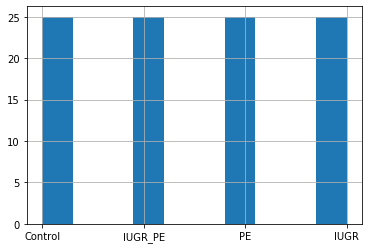

In [133]:
y_sm.hist()

In [37]:
from sklearn.tree import DecisionTreeClassifier
RESULTADOS = pd.DataFrame(columns=['Tarea', 'Resultado', 'Tiempo'])
RESULTADOS

,Tarea,Resultado,Tiempo


**ÁRBOL DE DECISIÓN** --> para visualizarlo: https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial#16.-Classification-Report-

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [189]:
X = data.drop('class', axis=1)
y= data['class']


In [207]:
X = data.drop(['class', "class2"], axis=1)
y= data['class2']

In [147]:
 
from time import time
from sklearn.model_selection import GridSearchCV
inicio=time()

parametros= {"n_neighbors":[1,2,3,4,5,6,7,8,9,10], "weights":['uniform', 'distance'], 
"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'] }

clasificador= KNeighborsClassifier()
grid= GridSearchCV(clasificador, parametros, scoring= "recall_macro")

grid.fit(X_sm, y_sm)

RESULTADOS.loc['8']= ('8', grid.best_score_, time()-inicio)

print(grid.best_params_)
print(grid.cv_results_['params'])
print(grid.best_estimator_)
RESULTADOS

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
[{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}, {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}, {'algorithm': 'auto', 'n_neighbors': 8, 'weights

,Tarea,Resultado,Tiempo
7,knn,0.794862,2.62446
8,8,0.801667,2.47500


In [78]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report #LIBRERÍA QUE TE HACE REPORT!!

classification_report(y_sm, y_pred)

'              precision    recall  f1-score   support\n\n     Control       0.66      0.89      0.76        28\n        IUGR       0.53      0.82      0.65        28\n     IUGR_PE       0.56      0.18      0.27        28\n          PE       0.55      0.43      0.48        28\n\n    accuracy                           0.58       112\n   macro avg       0.57      0.58      0.54       112\nweighted avg       0.57      0.58      0.54       112\n'

In [137]:
print(metrics.classification_report(y_sm, y_pred, digits=5))

              precision    recall  f1-score   support

     Control    0.65789   0.89286   0.75758        28
        IUGR    0.53488   0.82143   0.64789        28
     IUGR_PE    0.55556   0.17857   0.27027        28
          PE    0.54545   0.42857   0.48000        28

    accuracy                        0.58036       112
   macro avg    0.57345   0.58036   0.53893       112
weighted avg    0.57345   0.58036   0.53893       112



In [154]:
clas= KNeighborsClassifier(algorithm="auto", n_neighbors= 1, weights= 'uniform')


y_pred =cross_val_predict(clas,X_sm,y_sm)

a=metrics.classification_report(y_sm, y_pred, digits=16,output_dict= True)

In [155]:
df = pd.DataFrame(a).transpose()

In [156]:
df=df.drop("support", axis=1)
df=df.drop(df.index[[5,6]])
df.mean()

precision    0.796016
recall       0.794643
f1-score     0.791526
dtype: float64

In [146]:
metrics.recall_score(y_sm,y_pred, average="macro")

0.5803571428571429

In [154]:
inicio=time()
X = data.drop('class', axis=1)
y= data['class']
parametros= {}

clasificador= DecisionTreeClassifier()

clasificador.fit(X,y)

RESULTADOS.loc['Relog-c']= ('Clasificación', grid.best_score_, time()-inicio)

print(grid.best_params_)
print(grid.cv_results_['params'])
print(grid.best_estimator_)

{}
[{}]
DecisionTreeClassifier()


In [155]:
RESULTADOS

,Tarea,Resultado,Tiempo
Relog-c,Clasificación,0.547368,0.004


In [135]:
inicio =time()
parametros = {'C':[0.001,0.01, 0.1, 1, 10, 10, 100], 'penalty':['l1','l2']}

clasificador= LogisticRegression(solver='liblinear')
grid= GridSearchCV(clasificador, parametros, cv=5, verbose=1, n_jobs=-1)
grid.fit(X,y)

RESULTADOS.loc['Relog-c-penalty']= ('Clasificación', grid.best_score_, time()-inicio)

print(grid.best_params_)
print(grid.cv_results_['params'])
print(grid.best_estimator_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'C': 0.1, 'penalty': 'l2'}
[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1, 'penalty': 'l1'}, {'C': 1, 'penalty': 'l2'}, {'C': 10, 'penalty': 'l1'}, {'C': 10, 'penalty': 'l2'}, {'C': 10, 'penalty': 'l1'}, {'C': 10, 'penalty': 'l2'}, {'C': 100, 'penalty': 'l1'}, {'C': 100, 'penalty': 'l2'}]
LogisticRegression(C=0.1, solver='liblinear')


In [60]:
RESULTADOS = pd.DataFrame(columns=['ACCURACY', 'F1', 'ROC-AUC', 'TIEMPO'])
RESULTADOS

,ACCURACY,F1,ROC-AUC,TIEMPO


In [79]:
def clasificador(clasificador, data, clase ):
    X = data.drop(clase, axis=1)
    y = data[clase]
    clasificador.fit(X, y)
    
    y_pred= cross_val_predict(clasificador, X, y, cv=10)
    return y_pred

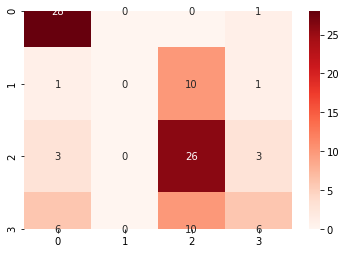

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve
clas1= LogisticRegression()
y_pred=clasificador(clas1, data, 'class' )

from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(data['class'], y_pred)

sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Reds')

In [201]:
data["class2"]= data['class'].map({'Control': 0, 'IUGR_PE': 1, 'IUGR': 1, 'PE': 1})

In [200]:
data['class'].unique()

array(['Control', 'IUGR_PE', 'IUGR', 'PE'], dtype=object)

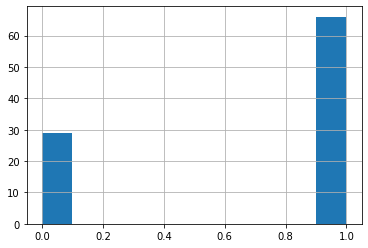

In [204]:
data["class2"].hist()

In [107]:

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

Algoritmos que voy a utilizar
* Regresión logística extendida
* Arboles de decisión
* Randowm Forest -> ver explicabilidad
* SVM
* KNN

https://medium.com/datos-y-ciencia/aprendizaje-supervisado-introducci%C3%B3n-a-la-clasificaci%C3%B3n-y-principales-algoritmos-dadee99c9407

## 4. Matriz de Correlación

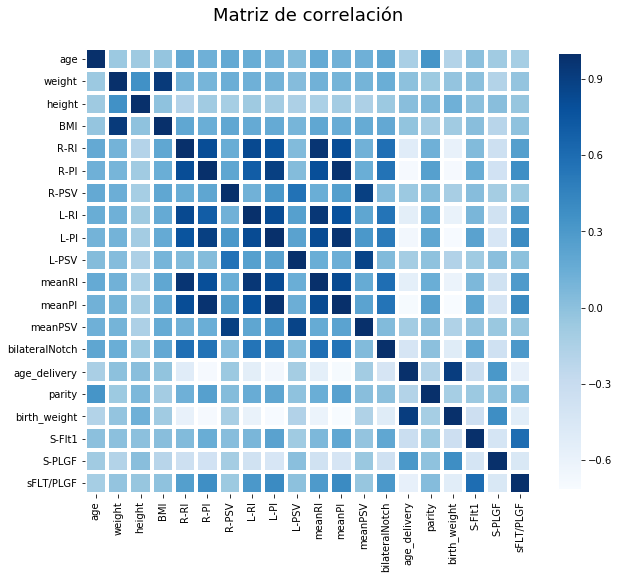

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))# plot heatmap
corr = data.corr()
graph=sns.heatmap(corr, cmap="Blues", linewidth=3, square= True,cbar_kws={"shrink": .8})

title = 'Matriz de correlación\n'
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize=18)
plt.show()

In [22]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [23]:
correlacion = pd.DataFrame(sol, columns=["Correlación"])
correlacion.head(15)

,,Correlación
R-PI,meanPI,0.974681
L-PI,meanPI,0.971184
R-RI,meanRI,0.963732
L-RI,meanRI,0.950348
weight,BMI,0.927886
age_delivery,birth_weight,0.911202
R-PSV,meanPSV,0.896526
R-PI,L-PI,0.893303
L-PSV,meanPSV,0.872190
R-RI,L-RI,0.832834


In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))# plot heatmap
corr = data.corr()
graph=sns.heatmap(corr, cmap="Blues", linewidth=3, square= True,cbar_kws={"shrink": .8})

title = 'Matriz de correlación\n'
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize=18)
plt.show()

ELIMINAR COLUMNAS DE GESTATIONAL AGE AT DELIVERY Y WEIGHT!! -> SON DATOS DESPUÉS DE HABER DADO A LUZ!!!

In [48]:
from time import time
from sklearn.metrics import classification_report #LIBRERÍA QUE TE HACE REPORT!!
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
def evaluacion_modelos2(clas, train_data):
    inicio= time()
    score=[]

    y_pred= cross_val_predict(clas, train_data[0], train_data[1])
       

    return y_pred

In [49]:
y_pred=evaluacion_modelos2(KNeighborsClassifier(), [X_sm,y_sm])

In [57]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_sm, y_pred)

In [58]:
c_matrix

array([[25,  1,  0,  2],
       [ 1, 23,  2,  2],
       [ 3, 14,  5,  6],
       [ 9,  5,  2, 12]], dtype=int64)

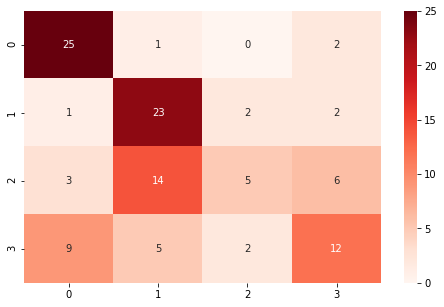

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))# plot heatmap
graph=sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Reds')
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [77]:
print(metrics.accuracy_score(y_sm, y_pred))
print(metrics.f1_score(y_sm, y_pred, average='micro'))
print(metrics.recall_score(y_sm, y_pred, average='micro'))
print(metrics.precision_score(y_sm, y_pred, average='micro'))

0.5803571428571429
0.5803571428571429
0.5803571428571429
0.5803571428571429


In [69]:
from sklearn import metrics